---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 3 (Evaluation)

https://www.coursera.org/learn/python-machine-learning/lecture/BE2l9/model-evaluation-selection


## Evaluation for Classification

When we began working with supervised machine learning methods, we evaluated a classifier's performance using its accuracy. 

>Accuracy, as you might recall, is the fraction of samples that were classified correctly. That is, where the classifier's predicted label matched the correct or true label. 

We also evaluated a regression model's performance using the default r squared metric. 

In this module, you'll learn why measures like accuracy, which are simple and easy to understand, also have _drawbacks_. In that they don't give a complete enough picture of a supervised learning model's performance. And may not be the right metric for measuring success in your application. 

So we're going to cover several additional evaluation metrics _beyond_ accuracy. 
- We'll see how they're defined, 
- what the motivation is for using them, and
- how to use them scikit-learn to get a better picture of how well a supervised model is doing on a given data set. 
- You'll also learn how about to choose the right evaluation matrix for your application that can help you select the best model or find the optimal parameters. 

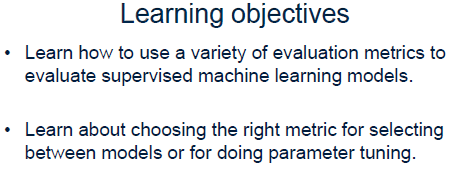


So let's return for a moment to this workflow diagram that we introduced earlier in the course. 

You see that __evaluation__ is a key part of this development cycle in applied machine learning. 
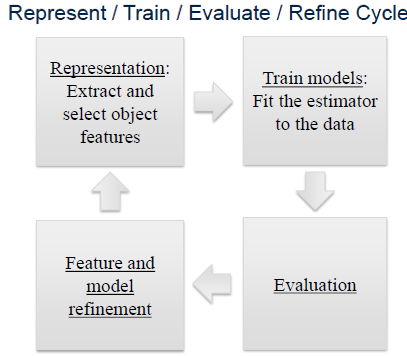

Once a model is trained, the evaluation step provides critical feedback on the trained model's performance characteristics. Particularly those that might be important for your application. 

> The results of the evaluation step, for example, might help you understand which data instances are being classified or predicted incorrectly. Which might in turn suggest better features or different kernel function or other refinements to your learning model in the feature and model refinement phase. 

As we discussed earlier, <font color='red'> the objective function that's optimized during the _training_ phase may be a __different__--what's called a _surrogate_ metric--that's _easier_ to use in practice for optimization purposes than what's used for the _evaluation_ metric. </font>

- For example, a commercial search engine might use a ranking algorithm that is trained to recommend relevant web pages that best match a query. In other words, trying to predict a relevant label for a page. And that might be the objective in the _training_ phase. 
- ___But___ there are many evaluation methods in the _evaluation_ phase that could be applied to measure aspects of that search engine's performance using that ranking algorithm, that are important to the search company's business. For example, such as
    - How many unique users the system sees per day.
    - Or how long the typical user search session is and so on. 

So the evaluation measures are the ones that in the end are used to _select between_ different trained models or settings. 

Actually commercial search applications typically use a __scorecard__ of multiple evaluation metrics to make important business decisions or development decisions about what models are chosen for use. 



So it's very important to choose __evaluation__ methods that match the goal of your application. 
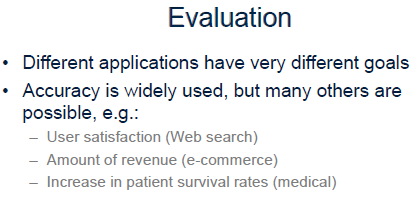

For predicting the correct digit from a handwritten image, let's say, where each digit is equally likely, then accuracy may be a sufficient metric. However, there are other possible aspects of evaluation of model performance that are beyond average accuracy that may be critical to measure. 

> For example, in a health application that uses a classifier to detect tumors in a medical image, we may want the classifier to error on the side of caution. And flag anything that even has a small chance of being cancerous. Even if it means sometimes incorrectly classifying healthy tissue as diseased. In this case, the classifier evaluation method would try to reduce what are called false negative predictions. We'll look at this in more detail shortly.

More generally, your application goal might be based on very different metrics, such as user satisfaction, amount of revenue to your page, or increase in patient survival rates.



So in the end, you'll be selecting the model or parameter settings that optimize those end evaluation metrics that are important to your goal.
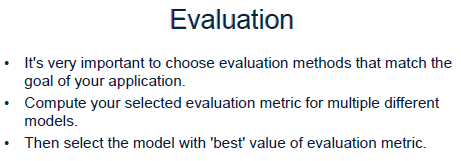

So in this module, we'll be focusing
- first on the widely used case of evaluating binary classification. 
- And then we'll look at evaluation for the more general case of multi-class evaluation as well as regression. 

Before we start defining and using some evaluation metrics for binary classification, lets start by looking at example of why just looking at accuracy may not be enough to gain a good picture of what a classifier's doing. 

It'll also show us how knowing more about the types of errors a learning algorithm makes can help us get a better picture of a model's predictive performance.

First, let's consider the case where we have a binary classification task, where there are a lot of instances labeled with the negative class. But only a few instances that belong to the positive class.

- For example, we might see this scenario in online search or recommender systems. Where the system has to predict whether or not to display an advertisement or product suggestion.
- Or show a query suggestion or item on a page that's likely to be relevant given a user's query and what they clicked on in the past and so on. 

So those would be the positive examples. 

But of course there are many, many irrelevant items that are in the negative class that don't make sense to show a user. And so this is called an __imbalanced class scenario__.

- Another example might be datasets of credit card transactions. Where the vast majority of transactions are classified as normal and not fraud with a small minority of transactions that could be classified as fraudulent. These situations, which also apply to multi-class classification problems, involve datasets that have imbalanced classes. 
- Imbalanced classes are _very_ common in machine learning scenarios, so it's important to understand how to work with them. 

In particular, let's assume that we have an e-commerce application. 
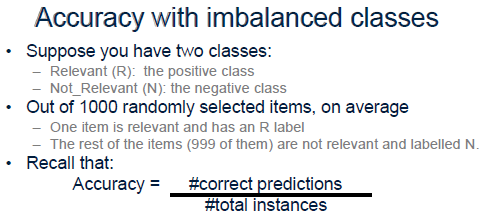

Where for every 1,000 randomly sampled product items, one of them is relevant to a user's need and the other 999 are not relevant. So recall that accuracy computed over a set of instances is just the number of instances where the classifier's label prediction was correct divided by the total number of instances.

Let's suppose you develop a classifier for predicting relevant e-commerce items. And after you've finished the development, you measure its accuracy on the test set to be 99.9%. At first, that might seem to be amazingly good, right? That's incredibly close to perfect. 

But let's compare that to a dummy classifier that always just predicts the most likely class, namely, the not relevant class. 

> In other words, no matter what the actual instance is, the dummy classifier will always predict that an item is not relevant. 

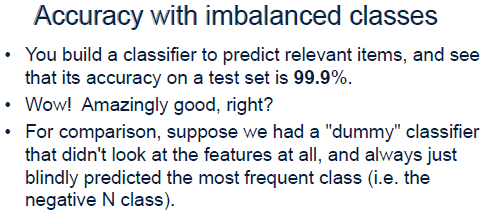


So if we have a test set that has 1,000 items, on average 999 of them will be not relevant anyway. So our dummy classifier will correctly predict the not relevant label for all of those 999 items. And so the accuracy of the dummy classifier is also going to be 99.9%. 

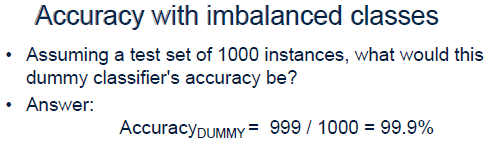

So in reality our own classifier's performance isn't impressive at all. ___It's no better than just always predicting The majority class without even looking at the data___. 

Let's take a look at another example of classification with imbalanced classes on a real dataset using our notebook.



### Preamble

I'll start here using the digits dataset, which has images of handwritten digits labeled with ten classes, representing the digits zero through nine. 

As we can see by letting the dataset and then computing the count of instances in each class, using numpy's __bincount__ method, here are roughly the _same_ number of instances in each class. 

So this dataset has __balanced__ classes.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

display(X, y)
display('X.shape: {}'.format(X.shape))
display('y.shape: {}'.format(y.shape))

#zips the digit seen AND the occurences of this digit
for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

'X.shape: (1797, 64)'

'y.shape: (1797,)'

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
y[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

However with this digits dataset, now what we're going to do is create a new dataset with two _imbalanced_ classes by
- labelling all digits that are _not_ the digit 1 as the negative class with label 0, 
- and digits that are 1 as the positive class, label 1. 

So what I've done here is dump the first few entries from the original labels along with the new binary label, so you can see the imbalance visually

In [3]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


Now when we use bincount, we can see that there are about 1,600 negative examples, but only 182 _positive_ examples. So indeed, we have a dataset that is class imbalanced. 

Or as expected almost exactly a _nine to one_ ratio of negative to positive examples.

In [4]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182], dtype=int64)

Now let's create a train-test partition on this imbalance set.

And then train a support vector machine classifier with these binary labels using the radial basis function as a kernel, we get the accuracy using the score method, and we can see this is just over 90%.

Again at _first_ glance, 90% accuracy for a classifier _seems_ pretty good.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9088888888888889

### Dummy Classifiers

> DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

However, now let's create a Dummy Classifier that correctly reflect the class imbalance to see if 90% really is that impressive. scikit-learn makes it easy to create a dummy classifier just by using the DummyClassifier class as shown here. Dummy classifiers, again, are called that because they __don't even look at the (testing) data__ to make a prediction. They simply use the strategy or rule of thumb that you instruct them to use, when creating them. 

>In fact, when you create the classifier, you set the strategy argument to tell it what rule of thumb to use to make its predictions.

So here, we set this to the most frequent strategy to predict the _most frequent_ class. The DummyClassifier here is used just like a regular classifier. So to prepare it for prediction, we
- call the fit method on the x_train and y_train variables that hold the training set instances and labels.
    - Now this DummyClassifier won't actually be looking at the individual data instances of those variables. 
    - But it _does_ use the y_train variable to determine which class in the training data is _most frequent_. 
- Finally, just like a regular classifier, we can call the predict method to make predictions on the test set.

This example shows the output of the DummyClassifier's predictions.

And as promised, you can see it's _always_ predicting 0 or the negative class for every instance in the test set.

In [6]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
dummy_majority.n_outputs_

1

Now we can call the usual score method to get the accuracy of the DummyClassifier's constant negative prediction. 

And we can see it's __also 90%__, the _same_ as our earlier support vector machine classifier with radial basis function kernel.

In [8]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

So that support vector classifier was actually performing only very _slightly_ better than the DummyClassifier. 

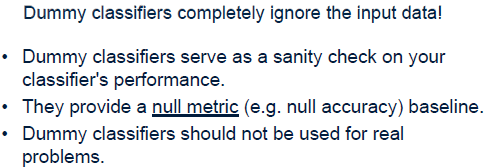

The dummy classifier provides what is called a null accuracy baseline. That is the accuracy that can be achieved by always picking the most frequent class. 

You should not use a dummy classifier for real classification problems, but it does provide a useful sanity check in point of comparison. 


There are other types of dummy classifiers that provide null baselines corresponding to other choices of the strategy parameter as shown here. 

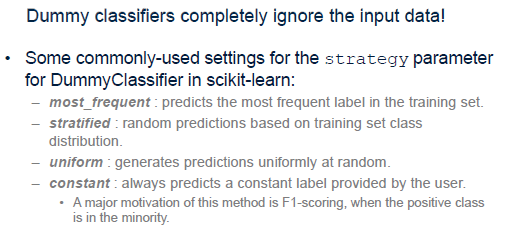

1. __most_frequent__ is the strategy we've just seen that always predicts the most_frequent label.

</br>
2. The __stratified__ strategy, unlike the constant most_frequent prediction is a random prediction that's based on the _class distributions_.
    - For example, if the positive class occurs 90% of the time in the training set. Then the stratified DummyClassifier will output the positive class label with 90% probability. Otherwise, it will output the negative class label.
    - This can help ensure that metrics that rely on having counts of both positive and negative class prediction outcomes can be computed.

</br>
3. The __uniform__ strategy is another random prediction method that will generate class predictions _uniformly at random_.
    - That is, all classes have an equal chance at being output as opposed to being weighed by their frequency in the training set.
    - This strategy may be useful for gaining an accurate estimate of what the most common types of prediction errors for each class.
    
</br>
4. Finally, the __constant__ strategy can be useful when computing some metrics like F score, which we will cover in a few minutes. (will need to provide a param to declare which class to predict constantly)
    - Well, why is that? Well, when we have a binary classification task where the most frequent class is the negative class. Turns out that using the most frequent strategy will never predict the positive class. And will never be able to count the number of positive instances that are correctly predicted. And so the overall count of such positive correct predictions will be 0. So this in turn as you will see in a few minutes, we'll cause some important metrics like F scores to __always be zero__. So using the constant strategy, we can force a dummy classifier to always predict the positive class even if it's the minority class in a set of classes. And this will lead to more meaningful computation of F-score.


So what does it mean if we discover that our classifier has close to the DummyClassifier's performance? 

While typically it means that
- the features in our model may be ineffective, or erroneously computed or missing for some reason, it could also be caused by 
- a poor choice of kernel or hyperparameter in the model.

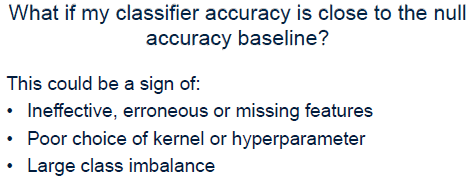

For example, if we change the support vector classifier's kernel parameter to __linear__ from rbf and recompute the accuracy on this retrain classifier, we can see that this leads to much _better_ performance of almost __98%__ compared to the most frequently class based line of 90%.

In [9]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

Finally, if you have accuracy that is close to that of a dummy classifier, it could be because there is _indeed_ a large class imbalance. 

And the accuracy gains produced by the classifier on the test set simply applied too _few_ examples to produce a significant gain. 

</br>
<font color='red'> In general, for imbalanced classification problems, you should use metrics other than accuracy.</font>

We'll look at one shortly called AUC, which is short for area under the curve. 

DummyRegressors, as you might guess, are the counterpart to DummyClassifiers for regression.
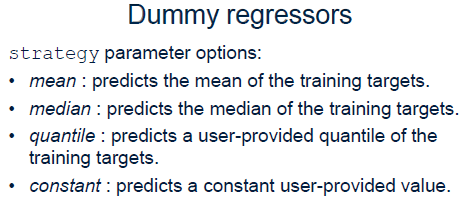

And they serve a similar role as a null outcome baseline and sanity check for regression models. 

Since regression models have continuous value prediction outputs, the strategy parameter for DummyRegressors gives you a choice of function that you can apply to the distribution of target values found in the training set. 

You can ask for the 
- mean or
- median value of the training set targets. 
- The value corresponding to the quantile that you provide 
- Or a custom constant value.

### Confusion matrices
#### Binary (two-class) confusion matrix

Now let's look more carefully at the different types of outcomes we might see using a binary classifier. This will give us some insight into why using just accuracy doesn't give a complete picture of the classifier's performance. And will motivate our definition and exploration of additional evaluation metrics. 

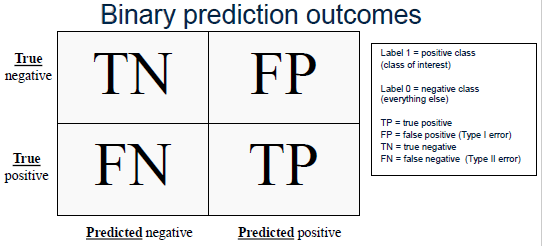

With a positive and negative class, there are _four_ possible outcomes that we can break into two cases corresponding to the first and second row of this matrix. 

- If the true label for an instance is negative, the classifier can predict either _negative_, which is _correct_, and call the __true negative__.
- Or it can _erroneously_ predict _positive_, which is an error and called a __false positive__. 
- If the true label for an instance is positive, the classifier can predict either _negative_, which is an _error_ and called a __false negative__.
- Or it can predict _positive_, which is _correct_ and that's called a __true positive__. 

So maybe a quick way to remember this is that
- the _first_ word in these matrix cells is
    - __false__, if it's a a __classifier error__, or 
    - __true__ if it's a __classifier success__.
- The _second_ word is 
    - __negative__ if the classifier (predicted) __label__ is negative and 
    - __positive__ if the classifier (predicted) __label__ is positive.

> Another name for a _false positive_ that you might know from statistics is a __type one error__.

> And another name for a _false negative_ is a __type two error__. 

We're going to use these two-letter combinations, TN, FN, FP, and TP, as variable names, when defining some new evaluation metrics shortly. 

We'll also use capital N here to denote the total number of instances, of the sum of all the values in the matrix, the number of data points we're looking at. 

This matrix of all combinations of predicted label and true label is called a confusion matrix. 

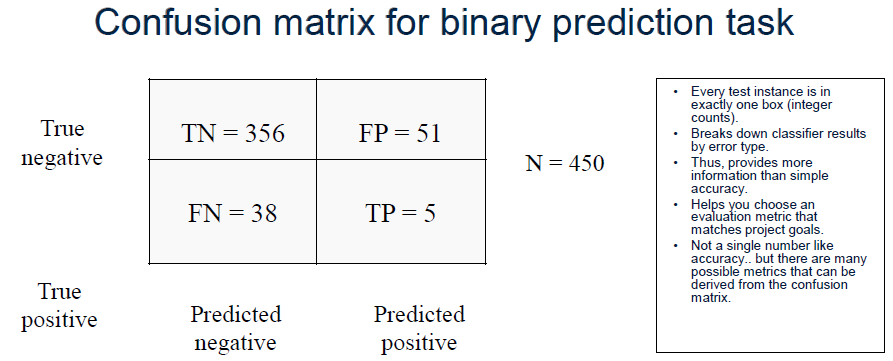

We can take _any_ classifier prediction on a data instance and associate it with one of these matrix cells, depending on 
- the true label of the instance and 
- the classifier's predicted label. 

This also applies to multi-class classification, in addition to the special case of binary classification I've shown here. 

> In the multi-class case with k classes, we simply have a __k by k matrix__ _instead_ of a two by two matrix.

Scikit-learn makes it easy to compute a confusion matrix for your classifier. Let's take a look at the notebook. Here, we import the confusion matrix class from sklearn.metrics. 

We're going to use the same training set from the digits data set with the binary imbalance labels that we created earlier. To get the confusion matrix, we simply pass 
- the y_test set of predicted labels and the 
- y_predicted set of predicted labels and then print the output. 

The order of the cells of the little matrix output here is the same as the one I just showed on the slide.

- True negative and false negative are in the first column, 
- and true positive and false positive are in the second column.

In particular, 
- the successful predictions of the classifier are on the diagonal where the true class matches the predicted class. 
- The cells off the diagonal represent errors of different types.

Here, we compute the confusion matrices for _different_ choices of classifier in the problem so we can see how they shift slightly with different choices of model. And this gives us some insight into the nature of successes and failures observed for each type of classifier.

1. So first, we'll apply the __most_frequent__ class DummyClassifier we saw earlier. 
    - What we can see here is that the right column, that represent cases where the classifier predicted the positive class, is _all_ zero. Which makes sense for this dummy classifier because it's always predicting the negative class, the most frequent one. 
    - We see that 407 instances are true negatives, and there are 43 errors that are false negatives.

In [10]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (is 0) (dummy classifier)\n', confusion)

Most frequent class (is 0) (dummy classifier)
 [[407   0]
 [ 43   0]]


2. Here we apply the __stratified__ DummyClassifier that gives random output in proportion to the ratio labels in the training set.
    - Now the right column is no longer all zero because this DummyClassifier does predict occasionally predict the positive class.
    - If we add the numbers in the right column, we see that 32 plus 6 equals 38 times the number of times the classifier predicted the positive class. 
    - Of those times, in six cases, the lower right diagonal, this was a true positive.

In [11]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[370  37]
 [ 37   6]]


In [12]:
type(confusion)

numpy.ndarray

In the next case, we'll apply a __support vector classifier with linear kernel__ and seed parameter equal to one. 

We note that looking along the diagonal compared to the stratified dummy classifier above, which had a total of 375 plus 6, or 381 correct predictions. 

The support vector classifier has a total of 402 plus 38, which is 440 correct predictions on the same data set.

In [13]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


Likewise, we can apply a __logistic regression__ classifier, and that obtains _similar_ results to the support vector classifier.

In [14]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


And finally, we can apply a __decision tree__ classifier, and look at the confusion matrix that results from that.

One thing we notice is, that _unlike_ the support vector or logistic regression classifier, which had _balanced numbers_ of false negatives and false positives, the decision tree makes more than __twice as many false negative__ errors, 17 of them actually, as false positive errors, of which there are 7.

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


Now that we've seen how a confusion matrix can give us a little more information about the types of errors a classifier makes, we're ready to move ahead and and define some _new_ types of evaluation metrics that use information from the computing matrix to give different perspectives on classifier performance

### Evaluation metrics for binary classification
https://www.coursera.org/learn/python-machine-learning/lecture/90kLk/confusion-matrices-basic-evaluation-metrics


So, let's go back to the matrix of possible binary classification outcomes. This time filled out with the actual counts from the notebooks __decision tree__ output.

Remember our original motivation for creating this matrix was to go beyond a single number accuracy, to get more insight into the different types of prediction successes and failures of a given classifier. Now we have these four numbers that we can examine and compare manually. 

Let's look at this classification result visually to help us connect these four numbers to a classifier's performance. What I've done here is plot the data instances by using two specific feature values out of the total 64 feature values that make up each instance in the digits dataset. 

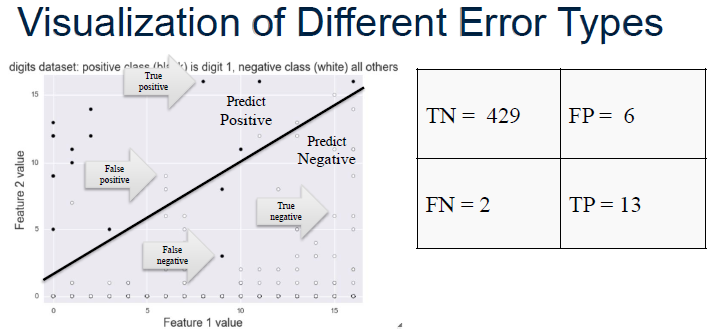

- The black points here are the instances with true class positive, 
    - namely the digit one
- and the white points have true class negative, that is, there are 
    - all the other digits except for one.
- The black line shows a hypothetical linear classifier's decision boundary for which 
    - any instance to the left of the decision boundary is predicted to be in the positive class and
    - everything to the right of the decision boundary is predicted to be in the negative class. 
- The true positive points are those black points in the positive prediction region and
- false positives are those white points in the positive prediction region. 
- Likewise, true negatives are the white points in the negative prediction region and 
- false negatives are black points in the negative prediction region.


We've already seen one metric that can be derived from the confusion matrix counts namely accuracy. 

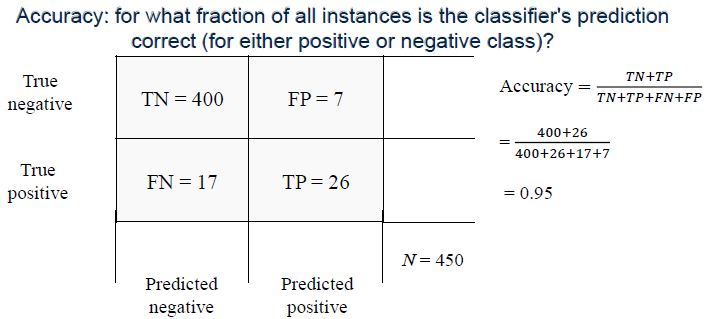

The successful predictions of the classifier, the ones where the predicted class matches the true class, are along the _diagonal_ of the confusion matrix. So, if we add up all the accounts along the diagonal, that will give us the total number of correct predictions across all classes, and dividing this sum by the total number of instances gives us accuracy. 

But, let's look at some _other_ evaluation metrics we can compute from these four numbers. 


Well, a very simple related number that's sometimes used is classification error, which is the sum of the counts off the diagonal namely all of the errors divided by total instance count, and numerically, this is equivalent to just one minus the accuracy.
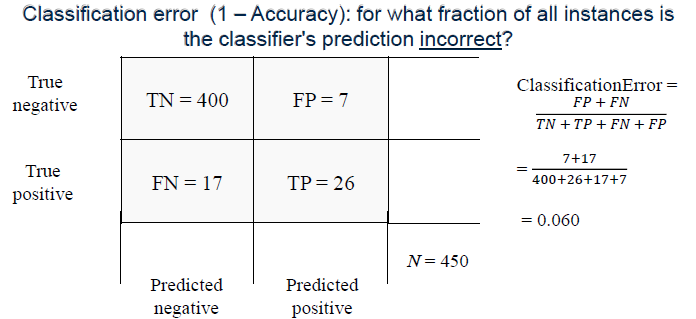

Now, for a more interesting example, let's suppose, going back to our medical tumor detecting classifier that we wanted an evaluation metric that would give higher scores to classifiers that 

- not only achieved the high number of true positives but 
- also __avoided__ false negatives. 

>That is, that rarely failed to detect a true cancerous tumor. 
 
__Recall__

> also known as the __true positive rate, sensitivity__ or probability of detection 

is such an evaluation metric and it's obtained by dividing the number of true positives by the sum of true positives and false negatives. 

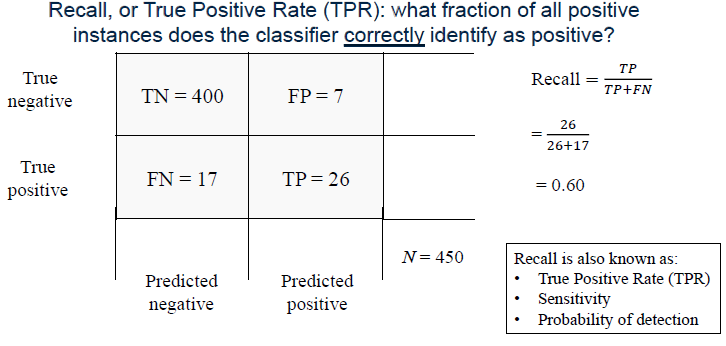

You can see from this formula that there are two ways to get a _larger_ recall number.

1. First, by either increasing the number of true positives or 
2. by __reducing__ the number of __false negatives__. 

Since this will make the denominator smaller. In this example there are 26 true positives and 17 false negatives which gives a recall of 0.6. 


Now suppose that we have a machine learning task, where it's really important to avoid false positives. 

In other words, we're fine with cases where not all true positive instances are detected but _when_ the classifier does predict the positive class, we want to be very confident that it's _correct_. 

> A lot of customer facing prediction problems are like this, for example, predicting when to show a user A query suggestion in a web search interface might be one such scenario.

Users will often ___remember the failures___ of a machine learning prediction _even_ when the majority of predictions are successes. 

So, __precision__ is an evaluation metric that reflects the situation and is obtained by dividing the number of true positives by the sum of true positives and false positives. 

So to increase precision, we must either
- increase the number of true positives the classifier predicts or 
- __reduce__ the number of errors where the classifier incorrectly predicts that a negative instance is in the positive class. 

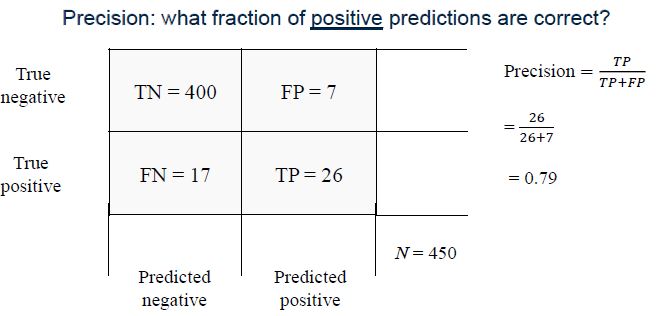

Here, the classifier has made seven false positive errors and so the precision is 0.79. 

Another related evaluation metric that will be useful is called the __false positive rate__,
> also known as __specificity__. 

This gives the fraction of all negative instances that the classifier incorrectly identifies as positive. 

Here, we have seven false positives, which out of a total of 407 negative instances, gives a false positive rate of 0.02. 

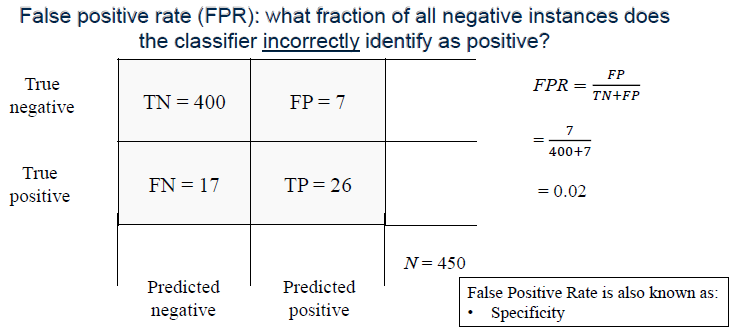



Going back to our classifier visualization, let's look at how precision and recall can be interpreted. 
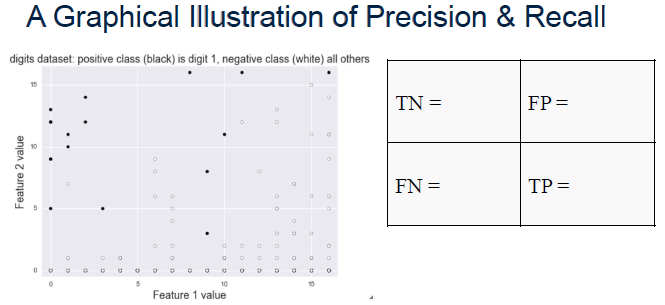

The numbers that are in the confusion matrix here are derived from this classification scenario. 

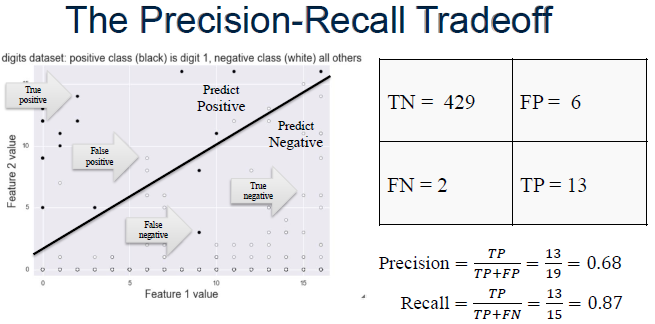

- We can see that a precision of 0.68 means that about 68 percent of the points in the positive prediction region to the left of the decision boundary or 13 out of the 19 instances are correctly labeled as positive. 
- A recall of 0.87 means, that of all true positive instances, so all black points in the figure, the positive prediction region has 'found about 87 percent of them' or 13 out of 15. 

If we wanted a classifier that was oriented towards _higher_ levels of precision like in the search engine query suggestion task, we might want a decision boundary instead that look like this. 

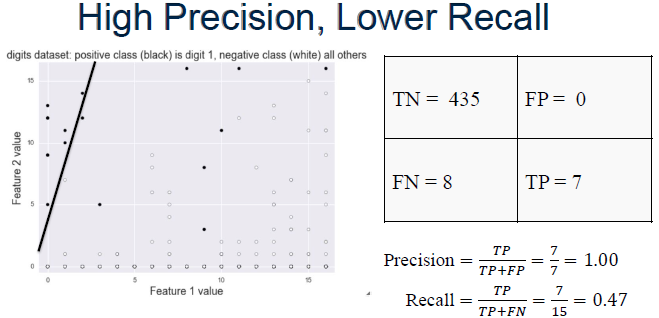

Now, _all_ the points in the positive prediction region (_seven out of seven_) are true positives, giving us a perfect precision of 1.0. 

Now, this comes at a __cost__ because out of the 15 total positive instances, eight of them are now false negatives, in other words, they're incorrectly predicted as being negative. 

And so, recall drops to 7 divided by 15 or 0.47. 



On the other hand, if our classification task is like the tumor detection example, we want to minimize false negatives and obtain high recall. In which case, we would want the classifier's decision boundary to look more like this. 

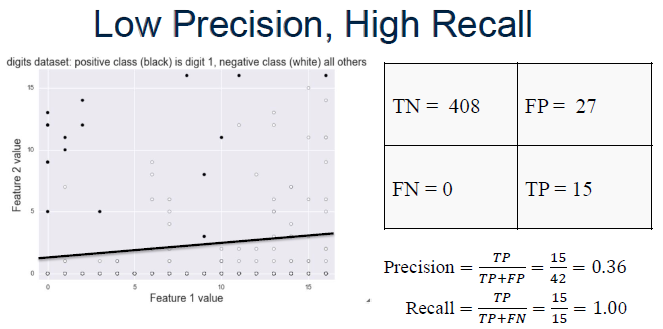

Now, _all_ 15 positive instances have been correctly predicted as being in the positive class, which means these tumors have all been detected. 

However, this also comes with a __cost__ since the number of false positives, things that the detector triggers as possible tumors for example that are actually not, has gone up. 

So, recall is a perfect 1.0 score but the precision has dropped to 15 out of 42 or 0.36. 


These examples illustrate a classic _trade-off_ that often appears in machine learning applications. 

Namely, that you can 
- often __increase the precision__ of a classifier but 
    - the _downside_ is that you may __reduce recall__, or 
- you could __increase the recall__ of a classifier
    - at the _cost_ of __reducing precision__.

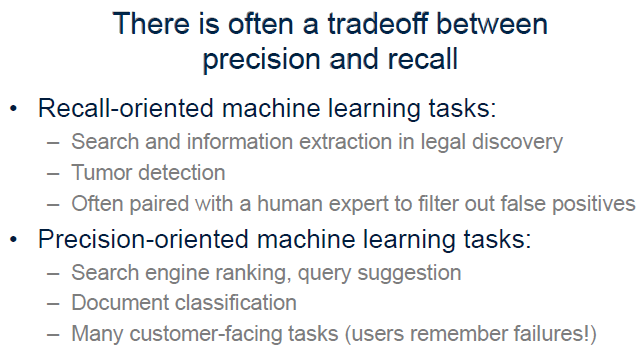

Recall oriented machine learning tasks include medical and legal applications, where the consequences of not correctly identifying a positive example can be high. 

> Often in these scenarios human experts are deployed to help filter out the false positives that almost inevitably increase with high recall applications. 

Many customer facing machine learning tasks, as I just mentioned, are often precision oriented since here the consequences of false positives can be high, for example, hurting the customer's experience on a website by providing incorrect or unhelpful information. 

>Examples include, search engine ranking and classifying documents to annotate them with topic tags. 

When evaluating classifiers, it's often convenient to compute a quantity known as an __F1 score__, that <font color='red'>___combines precision and recall into a single number___ </font>.

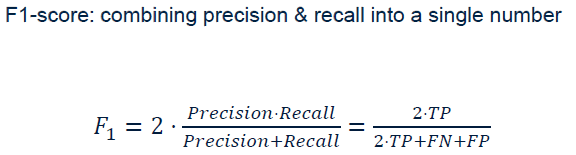

Mathematically, this is based on the _harmonic mean_ of precision and recall using this formula.

After a little bit of algebra, we can rewrite the F1 score in terms of the quantities that we saw in the confusion matrix: true positives, false negatives and false positives. 

This F1 score is a _special_ case of a more general evaluation metric known as an __F score__ that introduces a parameter beta.

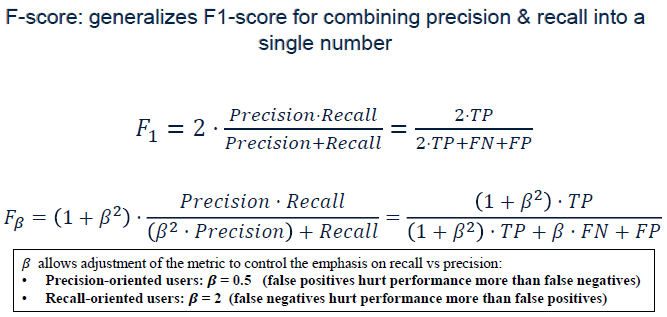

By adjusting beta we can control how much emphasis an evaluation is given to precision versus recall. 

For example, if we have 
- _precision_ oriented users, we might say a beta equal to 0.5, since 
    - we want false positives to hurt performance _more_ than false negatives. 
- For _recall_ oriented situations, we might set beta to a number larger than one, say two, 
    - to emphasize that false negatives should hurt performance _more_ than false positives. 
- The setting of beta _equals_ one corresponds to the F1 score special case that we just saw that weights precision and recall _equally_. 

### Evaluation metrics for binary classification using Scikit-Learn

Let's take a look now at how we can compute these evaluation metrics in Python using scikit-learn. 

Scikit-learn metrics provides functions for computing 
- accuracy, 
- precision, 
- recall, and 
- F1 score 

as shown here in the notebook.

The input to these functions is the _same_. 
1. The first argument here, y_test, is the array of true labels of the test set data instances and 
2. the second argument is the array of predicted labels for the test set data instances.

Here we're using a variable called tree_predicted which are the predicted labels using the decision tree classifier in the previous notebook step.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


It's often useful when analyzing classifier performance to compute _all_ of these metrics at once. So, sklearn metrics provides a handy __classification_report__ function. 

- Like the previous core functions, classification report takes the true and predicted labels as the first two required arguments. 
- It also takes some optional arguments that control the format of the output.
- Here, we use the _target names_ option to label the classes in the output table. 

You can take a look at the scikit-learn documentation for more information on the other output options. 

The last column, _support_, shows the number of instances in the test set that have that _true_ label.

In [17]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



Here we show classification reports for _four_ different classifiers on the binary digit classification problem. 

The first set of results is from the dummy classifier and we can see that as expected both precision and recall for the positive class are very low since the dummy classifier is simply guessing randomly with low probability of predicting that positive class for the positive instances.

In [18]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
              precision    recall  f1-score   support

      not 1       0.91      0.91      0.91       407
          1       0.14      0.14      0.14        43

avg / total       0.84      0.84      0.84       450

SVM
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.88      0.88      0.88        43

avg / total       0.98      0.98      0.98       450

Logistic regression
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



### Decision functions

https://www.coursera.org/learn/python-machine-learning/lecture/0YPe1/classifier-decision-functions

Many classifiers in scikit learn can provide information about the __uncertainty__ associated with a particular prediction either by using 
- the __decision_function__ method or
- the __predict_proba__ method.

When given a set of _test_ points, the __decision_function__ method provides for _each_ one a classifier score value that indicates how confidently the classifier
- predicts the _positive_ class. So there will be large magnitude _positive_ scores for those points, or 
- if it predicts a _negative_ class, there'll be large magnitude _negative_ scores for negative points. 

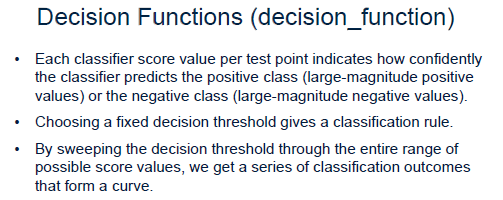

Here's an example in the notebook showing the first few instances from our classification problem using a logistic regression classifier. 

We can see the instances in the negative class often have large magnitude _negative_ scores. And indeed the instances in the positive class has _positive_ scores from the logistic regression classifier.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.72250047336062),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.749345951179265),
 (1, 5.23490021249531),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

Likewise, the __predict_proba__ function provides predicted _probabilities_ of class membership.

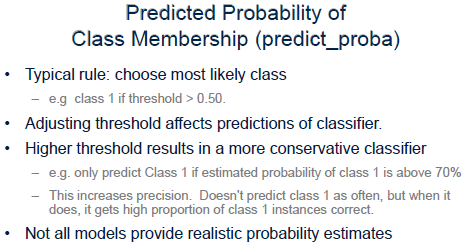

Typically a classifier will choose the _more likely_ class. That is in a binary classifier, you find the class with probability greater than 50%.

Adjusting this decision threshold affects the prediction of the classifier. A _higher_ threshold means that a classifier has to be more _confident_ in predicting the class. 

> For example, we might predict class one only if the estimated probability of class one was over 70%. And this results in a more conservative classifier.

Here's an example of getting these prediction probabilities for the test instances for the same logistic regression classifier.

You can see that many entries with a positive label of one, have a _high_ probability like 0.995. While many negative label instances have a _very low_ prediction probability.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 8.60108727067405e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.683793414513379e-09),
 (0, 5.832940124078156e-05),
 (1, 0.9947008742687163),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.56980024484208e-10),
 (0, 1.992053353707062e-05),
 (0, 6.706507243234968e-06),
 (0, 1.70461945380572e-05),
 (1, 0.9999864056960567),
 (0, 9.853591296551983e-13),
 (0, 2.600937459498366e-06),
 (0, 5.944289259618554e-12)]

<font color='red'> Note that __not all__ models provide useful probability estimates of this type. </font>

> For example, a model that was over-fit to a training set might provide overly optimistic high probabilities that were in fact _not accurate_.

Now, we can use these decision scores or prediction probabilities for getting _more complete_ evaluation picture of a classifiers performance. 

For a particular application, we might pick a specific decision threshold depending on whether we want the classifier to be _more or less_ conservative about making false-positive or false-negative errors.

It might not be entirely clear ___when developing___ a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall. 

</br>
So instead, what we'll do is, look at <font color = 'red'> how classifier ___performs for all possible decision thresholds.___</font>

This example shows how that works. 

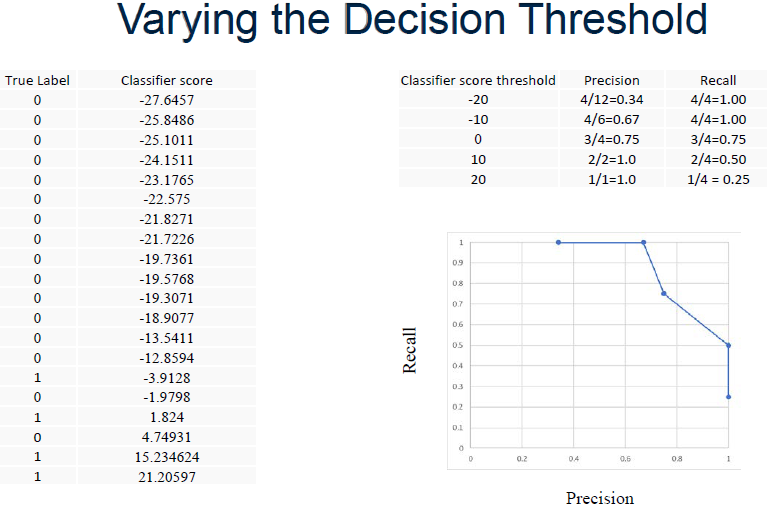


On the left here is a _list_ of test instances with their true label and classifier score.

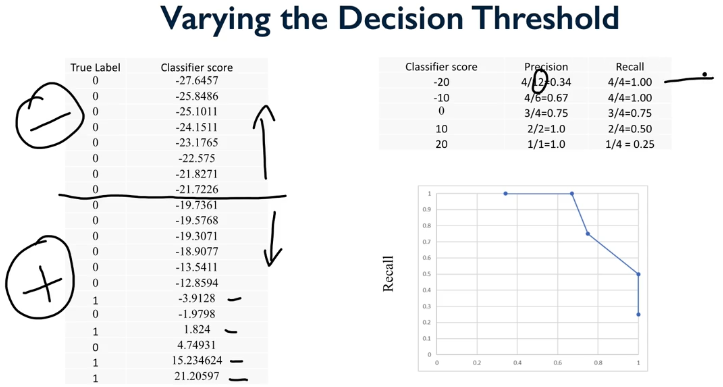


If we set a __decision threshold__ of the classifier score to be be __-20__ here (long black horizontal line), then:
- all the instances _above_ the line are _below_ the threshold of -20 (-20 or less).
- and all the instances _below_ the line are _above_ the threshold of -20. 

And so the "ones" (true label = positive)
- below the threshold will be predicted to be in the negative class (zero). 
- And the ones above the threshold will be predicted to be in the positive class (ones). 

So, if we pick the specific threshold (-20) and we partition the test points in this way, we can compute precision and recall for the points that are predicted to be in the positive class. 

- So in this case, we have 12 total instances that are being predicted as positive and only four of them (short horizontal hash marks), are _actually_ positive and so the __precision__ here is 4 / 12 or approximately 0.34. 
- The __recall__ on the other hand, there are four positive labeled instances in the whole set of test examples here and we've found _all_ of them with this particular threshold setting. So the recall here is 4 out of 4, we found all four positive labeled examples. 

And so, for this _particular_ threshold of -20, we can obtain a precision and recall score for that threshold.



Let's pick a different threshold let's look at what happened when the __threshold__ is __-10__ (horizontal black line)? 

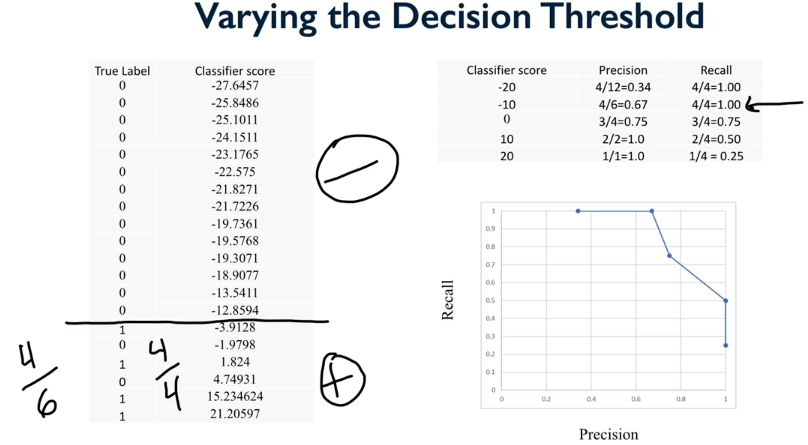

- So again anything _below_ this line has a higher value than -10 here, so those would be treated as _positive_ predictions. 
- Things _above_ the line have a score below -10, so these would be predicted to be _negative_.

And again, we can compute a precision and recall for this decision threshold setting, and we can see here that there are 
- a total of six instances in the positive prediction class of which four are actually of the positive class, and so the __precision__ here is 4 over 6 or about 0.67. 
- And again, the __recall__ here is going to be 4 out of 4, and it's going to be 1.0. 

Again, so that corresponds to this point in the table over here (black arrow)

 And then as were computing these different precision and recalls for different Thresholds. We can also plot them on this precision recall chart. 

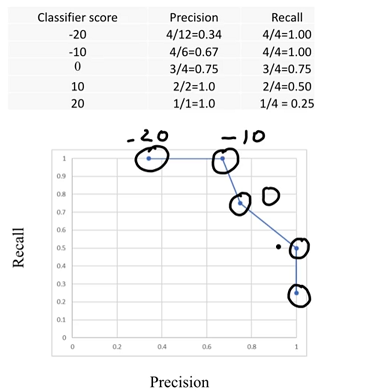

- So the first pair of precision recall numbers that I got, 0.34 and 1.0, we can plot on this point in precision recall space. 
- The second example, so this was for the threshold of -20. 
- When the threshold was -10, we got precision of .67 and a recall of 1 corresponding to this point that we can plot. 
- And so you can see that if we do this for a number of other thresholds, for example the threshold of 0, we'll get a precision of 0.75. And a recall of 0.75 that corresponds to this point.
- And we can keep doing that for different thresholds. 

And we actually are plotting a series of points through the space which we can be connected at as a curve. And so in this way, we can get a more complete picture by _varying_ the threshold of how the precision and recall of the result and classifier output _changes_ as a __function of the decision threshold__.

And this resulting chart here is called a precision recall curve and we'll look at it in more detail next.

### Precision-recall curves

https://www.coursera.org/learn/python-machine-learning/lecture/8v6DL/precision-recall-and-roc-curves

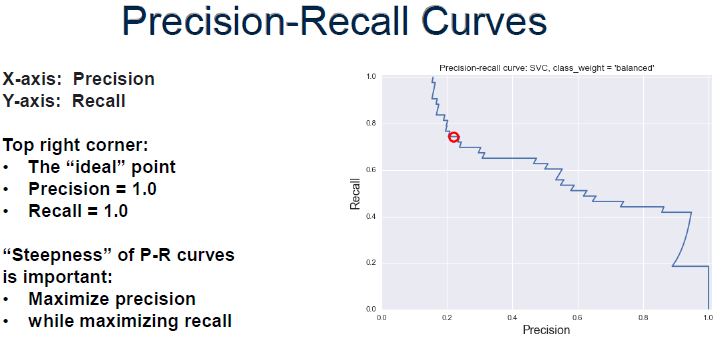

Precision-Recall Curves are very widely used evaluation method from machine learning. 

As we just saw in the above example, the x axis shows precision and the y axis shows recall. Now an ideal classifier would be able to achieve perfect precision of 1.0 and perfect recall of 1.0. 

> So the optimal point would be up here in the top right.

And in general, with precision recall curves, the closer in some sense, the curve is to the top right corner, the more preferable it is, the more beneficial the tradeoff it gives between precision and recall. And we saw some examples already of how there is a _tradeoff_ between those two quantities, between precision and recall, with many classifiers.

This example here is an actual precision recall curve that we generated using the following notebook code.

The <font color='red'> red circle </font> indicates the precision and recall that's achieved when the decision __threshold__ is __zero__. So I created this curve using exactly the same method as we saw in the previous example, by looking at the decision function output from a support vector classifier. Applying varying decision boundary, looking at how the precision of recall change as the decision boundary changed.

Fortunately, learn has a function that's built in that does all of that, that could compute the precision of recall curve. And that's what we've been using in the notebook here. 

So you can see that in this particular application there is a general _downward_ trend. 
> So as the precision of the classifier goes up, the recall tends to go down. 

In this particular case you'll see also that it's _not_ exactly a _smooth_ curve. There are some <font color='red'> __jaggy areas__ </font> and, in fact, the jumps tend to get a little _bigger_ as we approach maximum precision. 

> This is a consequence of how the formulas for precision and recall are computed. They use _discrete_ counts that include the number of true positives. And so as the __decision threshold increases__, there are __fewer and fewer points that remain as positive predictions__. So the fractions that are computed for these smaller numbers can change pretty _dramatically_ with _small_ changes in the decision threshold. And that's why these sort of trailing edges of the Precision-Recall Curve can appear a bit jagged when you plot them.

<IPython.core.display.Javascript object>


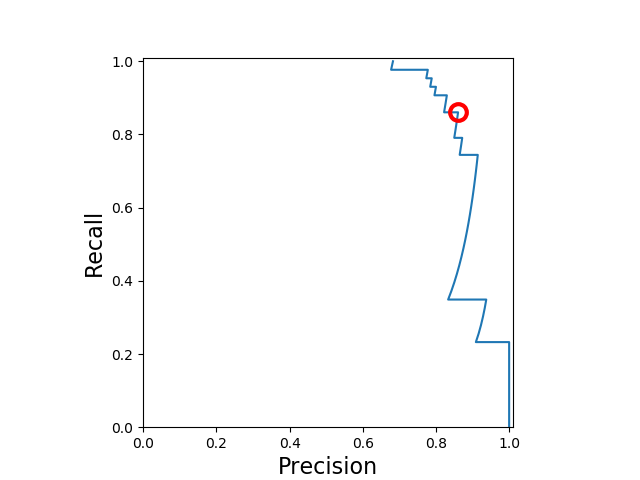

C:\Users\John\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### ROC curves, Area-Under-Curve (AUC)

ROC curves or receiver operating characteristic curves are a very widely used visualization method that illustrate the _performance_ of a binary classifier. 


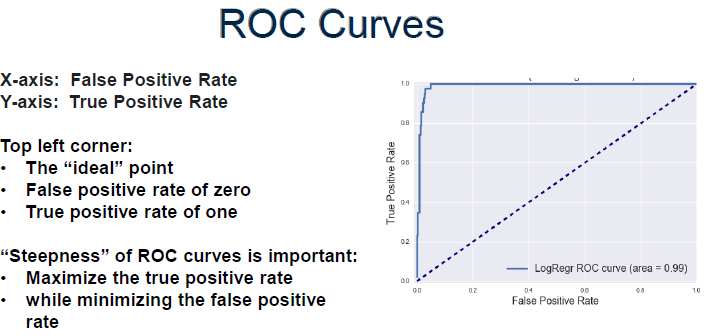


ROC curves 
- on the X-axis show a classifier's False Positive Rate so that would go from 0 to 1.0, and 
- on the Y-axis they show a classifier's True Positive Rate so that will also go from 0 to 1.0. 

> The ideal point in ROC space is one where the classifier achieves zero, a false positive rate of zero, and a true positive rate of one. So that would be the upper left corner.

So curves in ROC space represent different tradeoffs as the decision boundary, the decision threshold is varied for the classifier. So just as in the precision recall case, as we vary decision threshold, we'll get different numbers of false positives and true positives that we can plot on a chart.


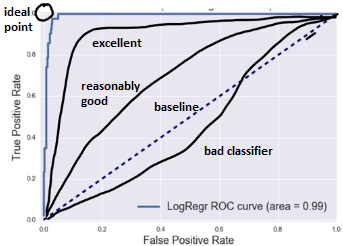


The dotted line here that I'm showing is the classifier ROC curve that results from a classifier that randomly guesses the label for a binary class. 

> It's basically like flipping a coin.  __If__ you have two classes with _equal_ numbers of positive and negative incidences, then flipping a coin will get you randomly equal numbers of false positives and true positives for a large virus data sets.

- So the dotted line here is used as a baseline. 
- So bad classifier will have performance that is random or maybe even worse than random or be slightly better than random. - - - Reasonably good classifier will give an ROC curve that is consistently better than random across all decision threshold choices. 
- And then an excellent classifier would be one like I've shown here, which is way up into the left.

This particular example is an example of a _logistic regression_ classifier using the notebook example you've seen.

So, the shape of the curve can be important as well, the steepness of the curve, we want classifiers that _maximize_ the true positive rate while _minimizing_ the false positive rate.

<IPython.core.display.Javascript object>


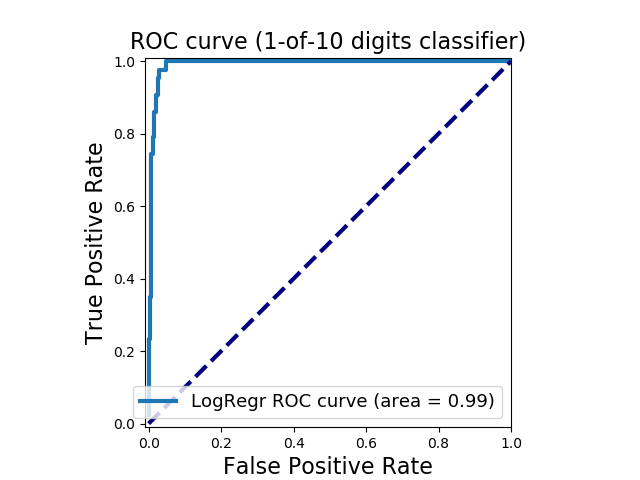

C:\Users\John\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [22]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Now as we'll see next, we can quantify the goodness of a classifier in some sense by looking at how much area there is underneath the curve. 

So the area underneath the random classifier is going to be 0.5 but then the area, as you can see, the size of the bumpiness of the classifier as it approaches the top left corner. Well, the area underneath the curve will get larger and larger -- it will approach 1. 

And so, as we'll see in the next slide. We use something called area under the curve, AUC. 

> That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance. So, an AUC of zero represents a very bad classifier, and an AUC of one will represent an optimal classifier.

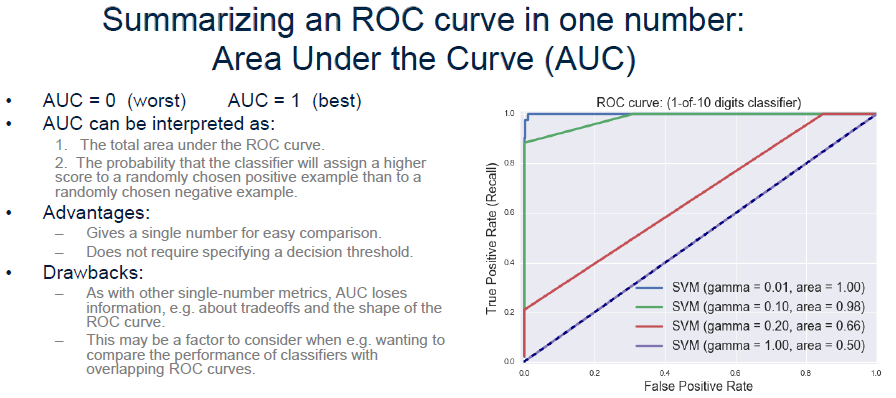

In [37]:
type(y_test)

numpy.ndarray

<IPython.core.display.Javascript object>


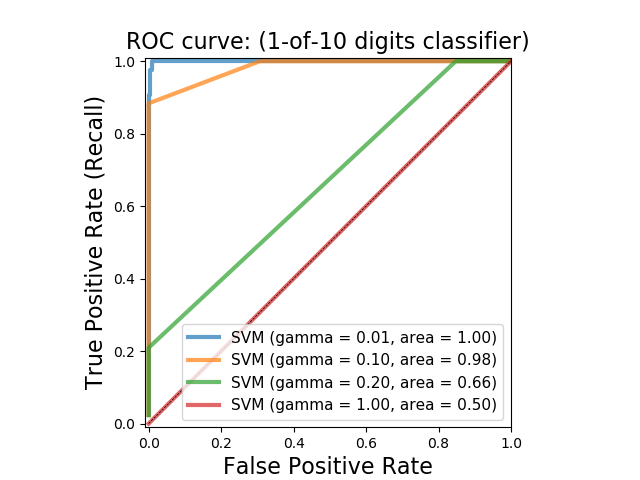

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


C:\Users\John\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [23]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Evaluation measures for multi-class classification

https://www.coursera.org/learn/python-machine-learning/lecture/1ugJR/multi-class-evaluation

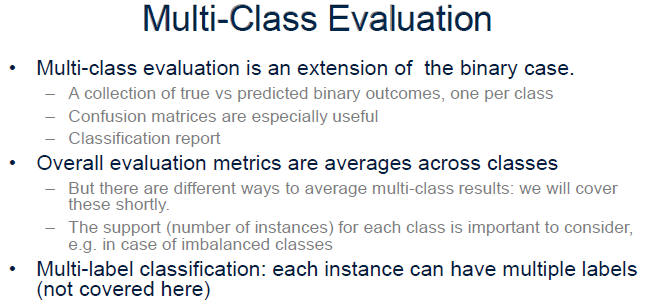

Now that we've looked at evaluation of binary classifiers, let's take a look at how the more general case of multi class classification is handled in evaluation.

- So in may respects, multi-class evaluation is a straightforward extension of the methods we use in binary evaluation. 
    - Instead of two classes, we have multiple classes. So, the results for multi-class evaluation amount to a collection of true verses predicted binary outcome per class.
- And just as we saw in the binary case, you can generate __confusion matrices__ in the multi-class case. 
    - They're especially useful when you have multiple classes, because there are many different kinds of errors that result from one true class being predicted as a different class. We'll look at an example of that. 
    - __Classification reports__ that we saw in the binary case are easy to generate for the multi-class case. 
- Now the one area, which is worth a little _more_ examination is how __averaging__ across classes takes place. 
    - There are different ways to average multi-class results that we'll cover shortly. And the __support__ (the number of instances for each class) is important to consider.
    - So just as we're all interested in how to handle imbalance classes in the binary case, it's important as you will see to consider similar issues of how the support for classes might vary to a large or small extent across multiple classes. 
- There is a case of __multi-label classification__ in which each instance could have _multiple_ labels. 
    - For example, a web page might be labeled with _different_ topics that come from a predefined set of areas of interest. 
    - We _won't_ cover multi-label classification in this lecture. Instead, we'll focus exclusively on multi-class evaluation. 

#### Multi-class confusion matrix

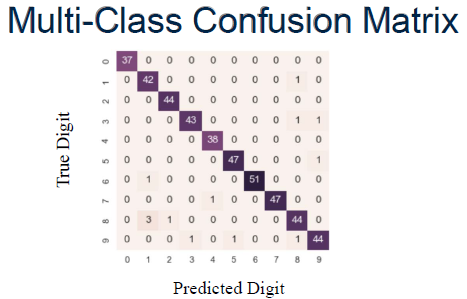

The multi-class confusion matrix is a _straightforward extension_ of the binary classifier two by two confusion matrix. 

For example, in our digits data set, there are ten classes for the digits, zero through nine. So, the ten class confusion matrix is a ten by ten matrix with 
- the true digit class indexed by row and
- the predicted digit class indexed by column. 
- As with the two by two case, the _correct_ prediction is by the classifier where the true class matches the predicted class are all along the diagonal 
- and misclassifications are off the diagonal.

In this example, which was created using the following notebook code based on a __support vector classifier with linear kernel__, we can see that most of the predictions are correct with only a few misclassifications here and there. 
- The most frequent type of mistake here is apparently misclassifying the true digit, eight as a predicted digit one which happened three times. And indeed, the overall accuracy is high, about 97% as shown here.
- As an aside, it's sometimes useful to display a confusion matrix as a __heat map__ in order to highlight the relative frequencies of different types of errors. So, I've included the code to generate that here.

For comparison, I've also included a _second_ confusion matrix on the same dataset for another support vector classifier that does much _worse_ in a distinctive way. The _only_ change is to use an __RBF__, radial basis function kernel instead of a linear kernel.
- While we can see for the accuracy number were about 43% below the confusion matrix that the classifier is doing much worse than the delinear kernel, that single number doesn't give much insight into why. 
- Looking at the confusion matrix, however, reveals that for _every_ true digit class, a significant fraction of outcomes are to predict the digit four. That's rather surprising. For example, of the 44 instances of the true digit 2 in row 2, 17 are classified correctly, but 27 are classified as the digit 4.
- Clearly, something is broken with this model and I picked this <font color='red'> second example just to show an _extreme_ example of what you might see when things go quite wrong.</font>

This digits dataset is well-established and free of problems. But especially when developing with a new dataset, seeing patterns like this in a confusion matrix could give you valuable clues about possible problems, say in the __feature pre-processing__ for example.

So as a general rule of thumb as part of model evaluation, I suggest ___always looking at the confusion matrix___ for your classifier to get some insight into what kind of errors it is making for each class including whether some classes are much more _prone_ to certain kinds of errors than others.

<IPython.core.display.Javascript object>


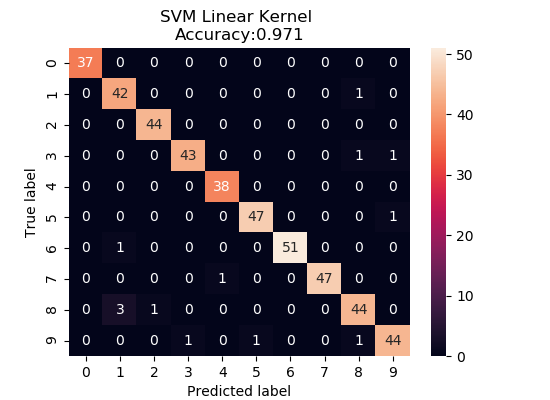

<IPython.core.display.Javascript object>


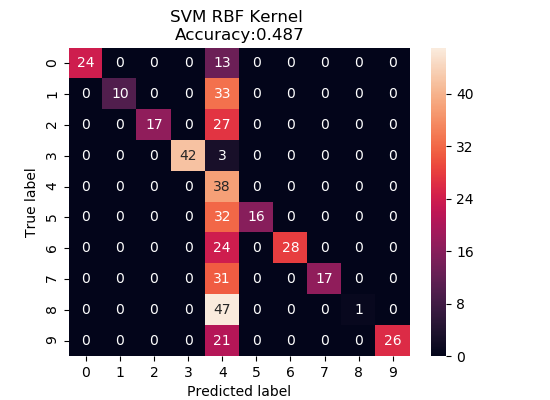

In [24]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report

Next, just as in the binary case, you can get a __classification report__ that summarizes multiple evaluation metrics for a multi-class classifier with an average metric computed for each class. 

In [25]:
print(classification_report(y_test_mc, svm_predicted_mc))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79        37
          1       1.00      0.23      0.38        43
          2       1.00      0.39      0.56        44
          3       1.00      0.93      0.97        45
          4       0.14      1.00      0.25        38
          5       1.00      0.33      0.50        48
          6       1.00      0.54      0.70        52
          7       1.00      0.35      0.52        48
          8       1.00      0.02      0.04        48
          9       1.00      0.55      0.71        47

avg / total       0.93      0.49      0.54       450



#### Micro- vs. macro-averaged metrics

Now what I'm about to describe, also applies to the binary class case, but it's easier to see when looking at multi-class classification problem with several classes.

So, here's an example of how to compute macro-average recall and micro-average recall on a sample dataset that I have extracted from our fruit dataset.

> __Note__: <font color='red'> in this figure, should say "recall" instead of "precision" </font>

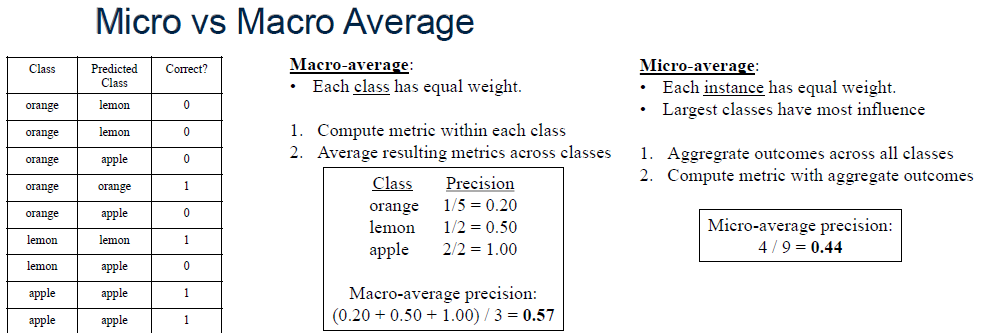

In this example, we have three columns where
- the first column is the true class of an example. 
- The second column is the predictive class from some classifier and 
- the third column is a binary variable that denotes whether the predictive class _matches_ the true class. 

And here, we have in our, this is a multi-class classification problem. And so, we have three classes here.

We have several instances there, the orange class. We have two instances that are the lemon class and we have two instances that are the apple class. 

So in this first example, we'll compute __macro-average recall__ and the key aspect of macro-average recall is that _each class_ has equal weight. So in this case, each of these classes will contribute one-third weight towards the final macro-average recall value. 

So, there are two steps to compute macro-average recall. 

The first one is to compute the metric. So in this case, we're going to compute recall within each class. 

1. So, let's take a look at the orange class. 
    - There are five total examples in the orange class and only one of them was predicted correctly by the classifier. And so, that leads to a recall for the orange class of 1 out of 5 or 0.20. 
2. For the second class, the lemon class. 
    - There are a total of two instances and only one of them was predicted correctly, and that leads to a recall of one-half or 0.50 for the lemon class. Let's write the recall for each of the classes that we have calculated. This was.
3. And for the third class, the apple class. 
- The classifier predicted both of these correctly. So, that's a recall of 2 out of 2 or 1.0. 

That's the first step: We've computed the recall metric within each class. 

And then in the second step, we simply average across these three to produce the final result, to get our final macro-average recall. And so we can simply compute the average of 0.2, 0.5 and 1 and we get our final macro-average recall for this set of results of 0.57.

> You'll notice here that no matter how many instances they were in each class, because we computed position within each class first, each class contributes __equally__ to the overall macro-average. So we could have had, for example, a million examples and from the orange class. But that class would have still been weighted equally, because we would have first computed recall for the million orange examples and then that number would still get a third of the weight compared to the other two classes.

So, that's macro-average recall. 

__Micro-average recall__ is computed a little differently and it gives _each instance_ in the data results here _equal_ weight. In micro-average recall, we don't compute recall for each class separately. We treat the entire dataset, the entire set of results here as an _aggregate_ outcome. So to compute micro-average recall, we simply look at how many of all the examples. 

We have nine examples here in total and micro-average recall will simply compute the precision for all the examples, regardless of class in the set of results. So out of these nine instances, we have found that the classifier predicted four of them correctly. And so, the micro-average recall is simply computed as 4/9 or 0.44.

>And you'll notice here that if we had a million instances of the orange class, for example, that with micro-average recall, because each instance has equal weight. That would lead to the orange class contributing many, many more instances to our overall micro-average recall. 

And so, the effect of micro-average recall is to __give classes with a lot more instances much more influence.__ So, the average here would have been influenced much more by the million orange examples than by the two lemon and apple examples.

And so, that is the difference between micro and macro-average recall. 

- If the classes have about the same number of instances, macro and micro-average will be about the same. 

- If some classes are much larger, have more instances than others and 
    - you want to weight your metric toward the largest ones, use micro-averaging. 
    - If you want to weight your metric towards the smallest classes, use macro-averaging. 

- If the micro-average is much lower than the macro-average, then examine the larger classes for poor metric performance. 
- If the macro-average is much lower than the micro-average, then you should examine the smaller classes to see why they have poor metric performance.

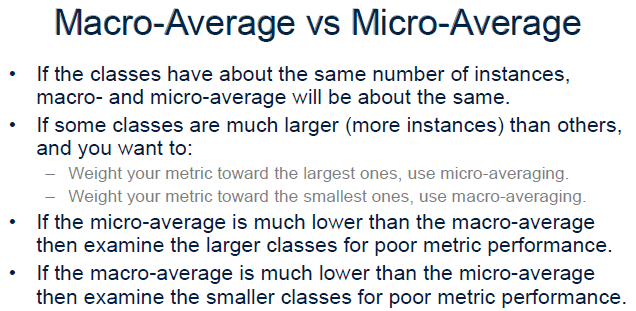

Here, we use the __average__ parameter on the scoring function. 

In the first example, we used the __precision__ metric and specify whether 
- we want micro-average precision which is the first case
- or macro-average precision in the second case.

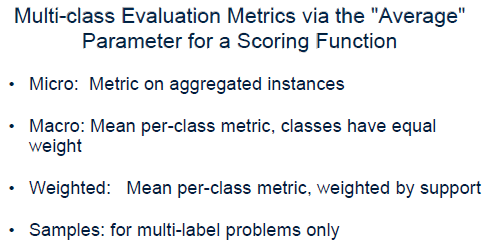

In [30]:
#Note microaveraged precision is much lower than macroaverage. So we should be looking at the largest classes for poor perf

print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.49 (treat instances equally)
Macro-averaged precision = 0.91 (treat classes equally)


In the second example, we use the __f1 metric__ and compute micro and macro-averaged f1. 

In [31]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.49 (treat instances equally)
Macro-averaged f1 = 0.54 (treat classes equally)


Now that we've seen how to compute these metrics, let's take a look at how to use
them to do model selection.

### Regression evaluation metrics

https://www.coursera.org/learn/python-machine-learning/lecture/iKS4j/regression-evaluation

We saw that for classification, because there were some scenarios like medical diagnostics predictions or costumer facing web site features, where the consequences of false positive were very different than false negatives. It made sense to _distinguish_ these types of errors and do a more detailed analysis. 

> In evaluating classifiers for example we looked at plots like precision recall curves that could show the trade offs a classifier could achieve between making errors of those two types.

In theory, we could apply the same type of error analysis and more detailed evaluation to regression that we applied for classification.

> For example, we _could_ analyze the regression model's predictions, and categorize errors of one type. Where the regression model's predicted value was much larger than the target value. Compared to a second error type, where the predicted value was much smaller than the target value.

In practice though it turns out that for _most_ applications of regression, _distinguishing_ between these types of different errors is __not as important__. This simplifies evaluation for regression quite a bit.

In most cases, the __default r squared score__ that's available for regression in scikit-learn and that summarizes how well future instances will be predicted, <font color='red'> is __adequate for most tasks__ </font>.

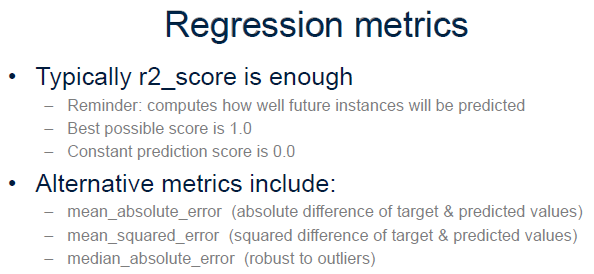

As a reminder, 
- the r2_score for perfect predictor is 1.0. 
- And for a predictor that always output the same constant value, the r2_score is 0.0. 
- The r2_score (despite the squared in the name that suggests it's always positive) does have the potential to go __negative__ for __bad model fits__, such as when fitting non-linear functions to data.

There are a few alternative regression devaluation metrics you should be aware of that work differently than the r2_score.

- __Mean absolute error__ takes the mean absolute difference between the target and predicted values.
    - In machine learning terms this corresponds to the __expected value of L1 norm loss__. 
    - This is sometimes used for example to asses focused outcomes for regression in time series analysis.
    
- __Mean squared error__ takes the mean squared difference between the target and predicted values and
    - this corresponds to the __expected value of the L2 norm loss__.
    - This is widely used for many regression problems and larger errors have correspondingly larger squared contributions to the mean error. 

> Like mean absolute error, mean squared error _doesn't distinguish_ between over and under estimates.

- Finally one situation that does arise quite often, is the existence of _outliers_ in the data, which can have unwanted influence on the overall r squared or mean squared value. So in those cases, when ignoring outlier is important, you can use the __median_absolute_error__ score, which is robust with the presence of outliers because it uses the median of the error distribution rather than the mean.

We saw how using how dummy classifiers could give us simple but useful baselines to compared against when evaluating a classifier. The same functionality exist for regression. There's a __DummyRegressor__ class that provides predictions using simple strategies that do not look at the input data.

This example which is available as the regression example from this lecture's notebook shows a scatter plot using database on a single input variable, which is plotted along the x axis from the diabetes data set. The points are the data instances from the test split and form a cloud that looks like it may trend down slightly to the right. 

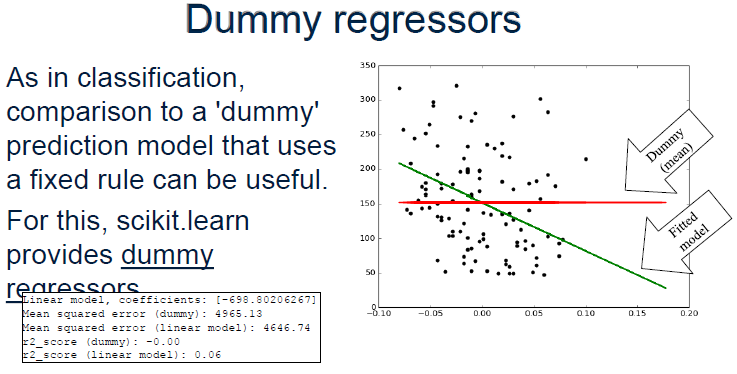
- The <font color='green'> green line </font> , which is also labeled fitted model is the default linear regression that was fit to the training points. 
    - We can see that it’s not a particularly strong fit to the test data.
- The <font color='red'>red line</font> labeled dummy mean, shows a linear model that uses the strategy of always predicting the _mean_ of the training data. 
    - So this is an example of a dummy regressor.

You can look at the notebook to see that a dummy regressor is created and used just like a regular regression model. You create, fit with the training data, and then call predict on the test data. 
> Although again, like the dummy classifier you should not use the dummy regressor for actual problems. Its only use is to provide a baseline for comparison.

Looking at the regression metrics output from the linear model compared to the dummy model. We can see that as expected the dummy regressor achieves an r squared score of 0. Since it always makes a constant prediction without looking at the output. In this instance the linear model provides only slightly better fit than the dummy regressor, according to both mean squared error and the r2_score. 

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>


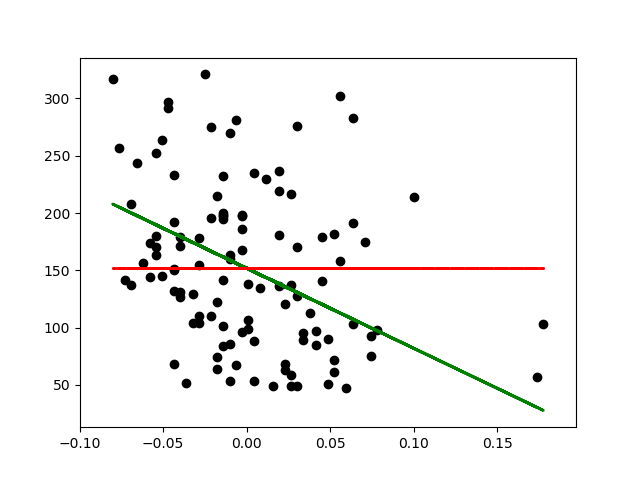

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

Aside from the strategy of always predicting the mean of the training target values, you could also create some other flavors of dummy regressors that always predict
- the median of the training target values, or 
- a particular quantile of those values, or
- a specific custom constant value that you provide.

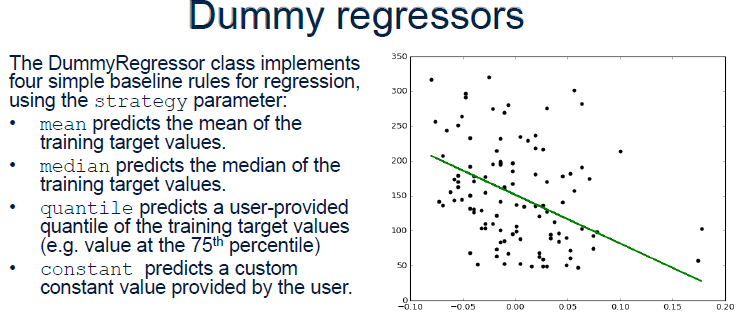

Although regression typically has simpler evaluation needs than classification, it does pay to double check to make sure the evaluation metric you choose for a regression problem does penalize errors in a way that reflects the consequences of those errors for the business, organizational, or user needs of your application.

### Model selection using evaluation metrics

https://www.coursera.org/learn/python-machine-learning/lecture/meBKr/model-selection-optimizing-classifiers-for-different-evaluation-metrics

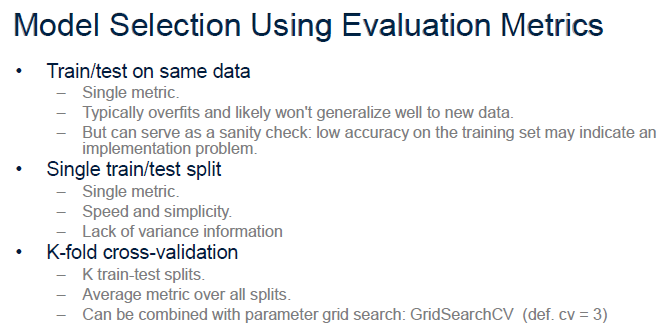

Now that you've seen a number of different evaluation metrics for both binary and multiclass classification, let's take a look at how you can apply them as criteria for __selecting the best classifier for your application__, otherwise known as __model selection__. 

In previous lectures we've seen a number of different evaluation frameworks for potential model selection. 

- First, we simply did training and testing on the same dataset, which as we well know, typically overfits badly and doesn't generalize well to new data. 
    - As a side note however, it can serve as a useful sanity check to make sure your software engineering and feature generation pipeline is working correctly.

- Second, we frequently use the single train-test split to produce a single evaluation metric. While fast and easy, 
    - this doesn't give as realistic a set of estimates for how well the model may work on future, new data. 
    - And we don't get a good picture for the __variance__ in the evaluation metrics that may result as we do prediction on different test sets.

- Third, we used k-fold cross-validation to create K random train-test splits, where the evaluation metric was averaged across splits. This leads to models that are _more_ reliable on unseen data. 

In particular, we can also use <font color='red'> __grid search__ using for example the GridSearchCV method ___within each cross-validation fold___, to find optimal parameters for a model with respect to the evaluation metric.</font>



#### Cross-validation example

The _default_ evaluation metric used for a cross-val score or GridSearchCV is accuracy. So how do you apply the _new_ metrics you've learned about here like AUC in model selection? 

Scikit-learn makes this very _easy_: you simply add a __scoring__ parameter that's set to the string with the name of the evaluation metric you want to use.

Let's first look at an example using the __scoring__ parameter for __cross-validation__, and then we'll take a look at the other primary method of model selection, grid search.

In the notebook here we have a cross-validation example where we're running five folds using a support vector classifier with a linear kernel and C parameter set to one. 

-  The first call to cross-val score just uses default __accuracy__ as the evaluation metric. 

-  The second call uses the scoring parameter using the string __'roc_auc'__, and this will use AUC as the evaluation metric.

-  The third call sets the scoring parameter to __'recall'__, to use that as the evaluation metric. 

You can see the resulting list of five evaluation values, one per fold for each metric. 

<font color ='red'> Now, here we're _not_ doing any parameter tuning we're simply evaluating our model's average performance across multiple folds. </font>

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


#### Grid search example

Now, in this grid search example we use a support vector classifier that uses a radial basis function kernel.

And the _critical_ parameter here is the __gamma__ parameter that intuitively sets the radius or width of influence of the kernel.

We use GridSearchCV to find the value of gamma that optimizes a given evaluation metric in two cases.

- In the first case, we just optimize for average __accuracy__;
- in the second case we optimize for __AUC__.

In this particular case the optimal value of gamma happens to be the same (0.001), for both evaluation metrics. As we'll see later in other cases, the optimal parameter value can be quite _different_ depending on the evaluation metric used to optimize.

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9962880475129918
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.9998741278302142


#### Evaluation metrics supported for model selection

You can see the complete list of names for the evaluation metric supported by the scoring parameter by running the following code that uses the score's variable imported from sklearn metrics.

You can see metrics for classification such as the string 'precision_ micro' that represents micro-averaged precision as well as metrics for regression such as the R2 metric for R-squared regression loss.

In [32]:
from sklearn.metrics.scorer import SCORERS

#this will print in a more "blocky" format: print(sorted(list(SCORERS.keys()))) 
sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'log_loss',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Two-feature classification example using the digits dataset

#### Optimizing a classifier using different evaluation metrics

Let's take a look at a specific example that shows how a classifier's decision boundary changes when it's optimized for different evaluation metrics. 

This classification problem is based on the same binary digit classifier training and test sets we've been using as an example throughout the notebook. 

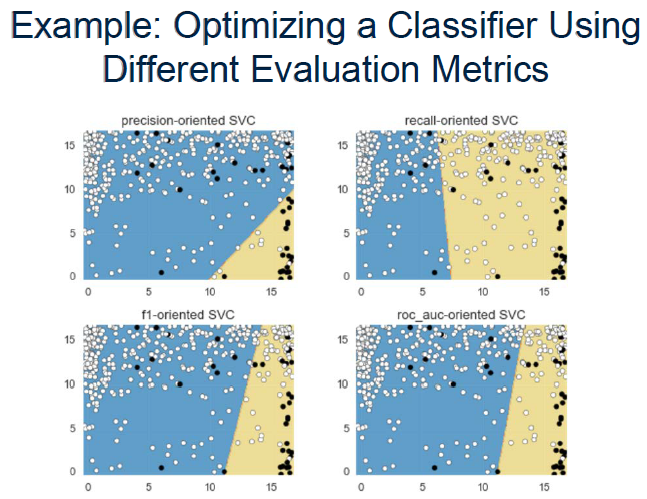

In these classification visualization examples, 
- the positive examples, the digit one are shown as black points and 
- the region of positive class prediction is shown in the light-colored or yellow region (light grey in output below) to the RIGHT of this decision boundary. 
- The negative examples, all other digits, are shown as white points (yellow points in output below). 
- And the region of negative class prediction here in these figures is to the LEFT of the decision boundary. 

The data points have been plotted using two out of the 64 feature values in the digits' dataset and have been jittered a little. That is, I've added a little bit of random noise so we can see more easily the density of examples in the feature space. 

Here's the scikit-learn code that produced this figure.

We apply grid search here to explore different values of the optional __class weight__ parameter that controls how much weight is given to each of the two classes during training. As it turns out, optimizing for different evaluation metrics results in _different_ optimal values of the class weight parameter. 

> As the class weight parameter increases, more emphasis will be given to correctly classifying the positive class instances.

-  The **precision-oriented classifier** we see here with class weight of two, tries hard to reduce false positives while increasing true positives. 
    - So it focuses on the cluster of positive class points in the lower right corner where there are relatively few negative class points. Here, precision is >50%. 

-  In contrast, the __recall-oriented classifier__ with class weight of 50, tries hard to reduce the number of false negatives while increasing true positives.
    - That is, it tries to find most of the positive class points as part of its positive class predictions.
    
- We can also see that the decision boundary for the __F1-oriented classifier__ has an optimal class weight of three, which is between the optimal class weight values for the precision and recall-oriented classifiers.
    - Visually we can see that the F1-oriented classifier also has a kind of intermediate positioning between the precision and recall-oriented, decision boundaries. This makes sense given that F1 is the harmonic mean of precision and recall. 

-  __AUC-oriented classifier__ with optimal class weight to 5 has a similar decision boundary to the F1-oriented classifier, but shifted slightly in favor of higher recall. 

<IPython.core.display.Javascript object>


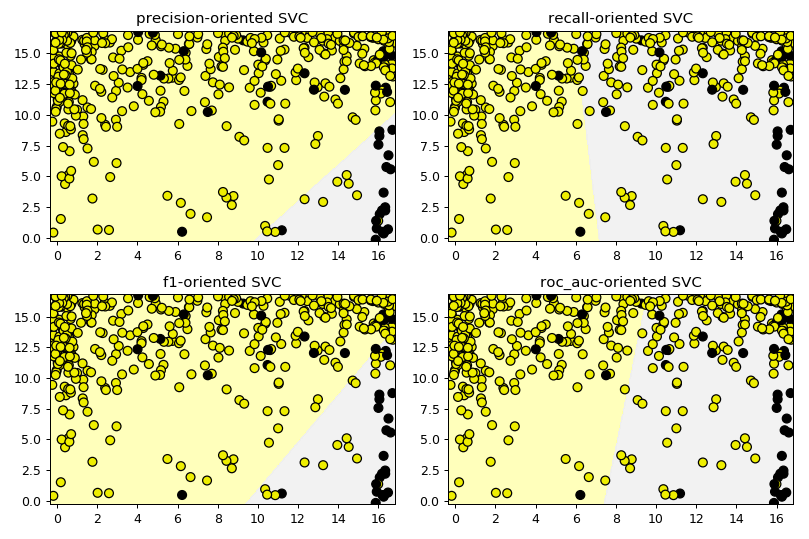

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5233705885524742
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9356451826685813
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.4934885168953709
Grid best parameter (max. roc_auc): {'class_weight': {1: 20}}
Grid best score (roc_auc): 0.8886640592289614


In [35]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

#### Precision-recall curve for the default SVC classifier (with balanced class weights)

We can see the precision recall trade-off very clearly for this classification scenario in the precision recall curve for the
default support vector classifier with linear kernel optimized for accuracy on the same dataset, and using the **balanced option** for the class weight parameter. 

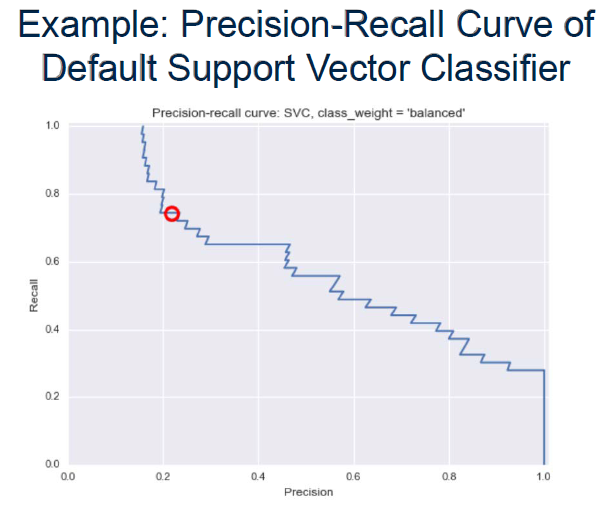

Let's take a look at the code that generated this plot. (See below __Figure: SVC, class_weight = 'balanced', optimized for accuracy__)

Take a moment to imagine how 
- the extreme lower right part of the curve on this precision recall curve represents a decision boundary that's highly __precision-oriented__ in the lower right of the classification plot, where there's a __cluster of positive examples__.
- As the decision threshold is shifted to become less and less conservative, tracing the curve up into the left, the classifier becomes more and more like the __recall-oriented__ support vector classifier example.

Again, the <font color='red'>__red circle__</font> represents the precision recall trade-off achieved at the zero score mark, which is the <font color=red> actual decision boundary chosen for the trained classifier.</font> For simplicity, we've often used a single train-test split in showing examples of evaluation scoring.

<IPython.core.display.Javascript object>


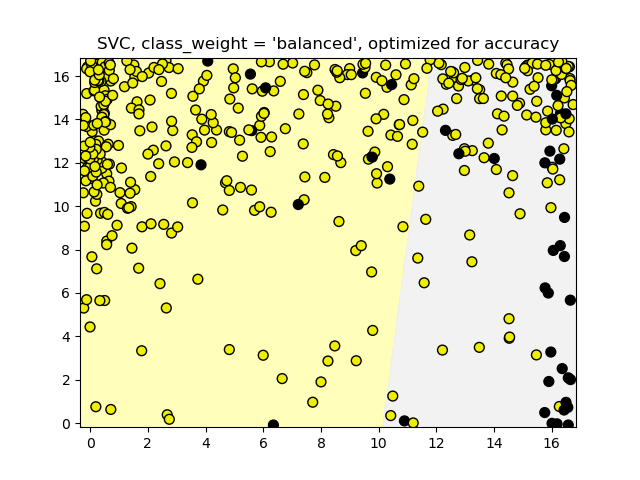

<IPython.core.display.Javascript object>


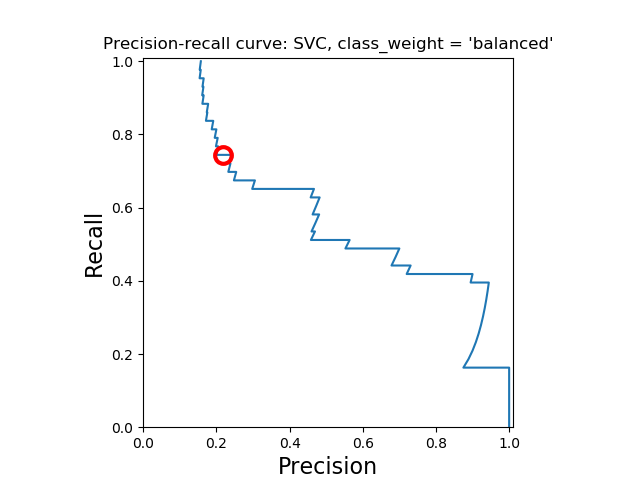

At zero threshold, precision: 0.22, recall: 0.74


C:\Users\John\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

However, using only __cross-validation__ or a __test set__ for model selection or parameter tuning may still lead to more subtle forms of overfitting and optimistic evaluation estimates for future, unseen data. 

An intuitive explanation for this might be the following: 
> Remember that the whole point of evaluating on a test set is to estimate how well a learning algorithm might perform on future, unseen data. The more information we see about our dataset as part of _repeated_ cross-validation passes in choosing our model, the _more influence_ any potential held-up test data has played into _selecting_ the final model. __Not__ merely evaluating it. 

> This is sometimes called _data leakage_ and we'll describe more about that phenomenon in another module.

So, we haven't done an evaluation with a _truly_ held-out test set unless we __commit__ to holding back a test split that isn't seen by any process until the very end of the evaluation. So that's what's actually done in practice.

There are three data splits:
- training for model building, 
- validation for model selection and 
- a test set for the final evaluation. 

The training and test sets are typically split out first, and then cross-validation is run using the training data to do model and parameter selection. 

Again, the test set is not seen until the very end of the evaluation process.

> Machine learning researchers ___take this protocol very seriously___. The train-validate-test design is a very important universally applied framework for effective evaluation of machine learning models.

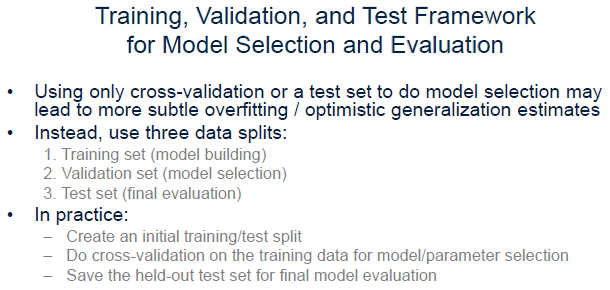

That brings us to the end of this section of the course on evaluation for machine learning.

You should now understand why accuracy only gives a partial picture of a classifier's performance and be more familiar with the motivation and definition of important alternative evaluation methods and metrics of machine learning like
- confusion matrices, 
- precision, 
- recall, 
- F1 score and 
- area under the ROC curve. 

You've also seen how to apply and choose these different evaluation metric alternatives in order to optimize model selection or parameter tuning for a classifier, to maximize a given evaluation metric.


Finally, I'd like to leave you with a couple of points. 

First, simple accuracy may not often be the right goal for your particular machine learning application. 
As we saw for example with tumor detection or credit card fraud, false positives and false negatives might have very different
real-world effects for users or for organization outcomes. So it's important to select an evaluation metric that reflects those
user application or business needs. 

Second, there are a number of other dimensions along which it may be important to evaluate your machine learning 
algorithms, that we don't cover here but that are important for you to be aware of.

I'll mention two specifically here. 

-  <font color=red>__Learning curves__</font> are used to assess how a machine learning algorithm's evaluation metric 
changes or improves as the algorithm gets more training data. Learning curves may be useful as part of a cost-benefit analysis. Gathering training data in the form of labeled examples is often time-consuming and expensive. So being able to estimate the likely performance improvement of your
classifier, if you say invest in doubling the amount of training data, can be a useful analysis. 

- Second, <font color=red>__sensitivity analysis__ </font> amounts to looking at how an evaluation metric changes as small adjustments are made to important model parameters. This helps assess how robust the model is to choice of parameters. This may be important to perform especially if there are other costs 
such as runtime efficiency that are critical variables when deploying an operational system, that are correlated with different
values of parameter. For example, decision tree depth or future value threshold. In this way, a more complete picture of the
trade-offs achievable across different performance dimensions can help you make the best practical deployment decisions for
your machine learning model.

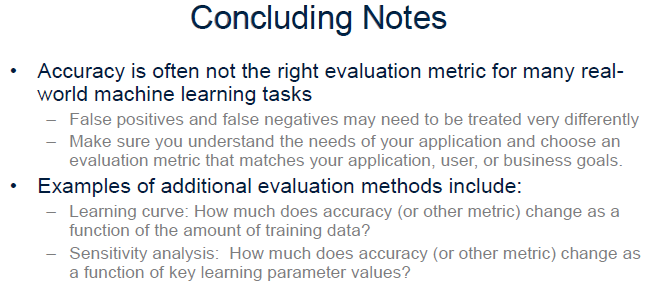